# **IRWA PROJECT - PART 2**

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Indexing

In [97]:
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [98]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
from collections import defaultdict
from array import array
import math
import numpy as np
import collections
import pandas as pd
import json
from numpy import linalg as la

In [99]:
import json

# Ruta al archivo JSON
#docs_path = '/content/drive/MyDrive/IRWA/2023/IRWA PROJECT_PART1/Rus_Ukr_war_data.json'
docs_path = "Rus_Ukr_war_data.json"

with open(docs_path) as fp:
  lines = fp.readlines()
lines = [l.strip().replace(' +',' ')for l in lines]


In [100]:
!pip install emoji

In [101]:
import emoji

def replace_emojis_with_descriptions(text):
    # Use the emoji library to replace emojis with their descriptions
    return emoji.demojize(text)

text = "I’m still waiting for my google map 🗺️ to update Russia 🇷🇺 new annexed territory but it’s taking a bit longer than I thought 🤔 #Putin #UkraineRussiaWar"

replace_emojis_with_descriptions(text)

'I’m still waiting for my google map :world_map: to update Russia :Russia: new annexed territory but it’s taking a bit longer than I thought :thinking_face: #Putin #UkraineRussiaWar'

In [102]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re

def build_terms(line):
    """
    Preprocess the text by removing URLs, tags, punctuation, stop words, and perform stemming and lemmatization.

    Arguments:
    line -- string (text) to be preprocessed

    Returns:
    line -- a list of preprocessed tokens
    """

    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words("english"))

    # Transform to lowercase
    line = line.lower()

    # Delete URLs
    line = re.sub(r'http\S+', ' ', line)

    # Delete tags (e.g., @username)
    line = re.sub(r'@\S+', ' ', line)

    # Replace emojis by their descriptions
    line = replace_emojis_with_descriptions(line)

    # Delete punctuation
    line = re.sub(r'[^\w\s]', ' ', line)

    # Tokenize the text to get a list of terms
    line = line.split()

    # Delete empty strings, hashtags, and stopwords
    line = [x for x in line if x not in ('', ' ', '#') and x not in stop_words]

    # Perform stemming and lemmatization
    line = [stemmer.stem(word) for word in line]
    line = [lemmatizer.lemmatize(x) for x in line]

    return line


In [103]:
from collections import defaultdict
from array import array

def create_index(lines):
    """
    Implement the inverted index

    Argument:
    lines -- collection of preprocessed-tweets

    Returns:
    index - the inverted index (implemented through a Python dictionary) containing terms as keys and the corresponding
    list of documents where these keys appears in (and the positions) as values.
    """
    index = defaultdict(list)

    for line in lines:  # Remember, lines contain all documents from file
        #print(line)
        line_arr = line.split(",")
        #print(line_arr)
        page_id_str = line_arr[1].strip()  # Remove leading and trailing spaces
        page_id_str = page_id_str.replace('"id":', '')  # Remove any additional text
        page_id = int(page_id_str)
        #print(page_id)

        terms = build_terms(''.join([line_arr[1], line_arr[3]]))  # page_title + page_text
        #print(terms)

        ## ===============================================================
        ## create the index for the current page and store it in current_page_index (current_page_index)
        ## current_page_index ==> { ‘term1’: [current_doc, [list of positions]], ...,‘term_n’: [current_doc, [list of positions]]}
        ## ===============================================================

        current_page_index = {}

        for position, term in enumerate(terms): # terms contains id + page_text. Loop over all terms
            try:
                # if the term is already in the index for the current page (current_page_index)
                # append the position to the corresponding list (elemento 1 del arreglo, el 0 es la id del documento)
                current_page_index[term][1].append(position)
            except:
                # Add the new term as dict key and initialize the array of positions and add the position
                current_page_index[term] = [page_id, array('I', [position])]  #'I' indicates unsigned int (int in Python)

        # merge the current page index with the main index
        for term_page, posting_page in current_page_index.items():
            index[term_page].append(posting_page)

    return index

In [104]:
index = create_index(lines)

print(index)

print(type(index))

print(len(index))

defaultdict(<class 'list'>, {'id': [[1575918221013979136, array('I', [0])], [1575918081461080065, array('I', [0])], [1575917992390823936, array('I', [0])], [1575917907774967809, array('I', [0])], [1575917878410301441, array('I', [0])], [1575917759707299841, array('I', [0])], [1575917751360593920, array('I', [0])], [1575917748978434053, array('I', [0])], [1575917670049857538, array('I', [0])], [1575917624298307585, array('I', [0])], [1575916840286507009, array('I', [0])], [1575916494990417920, array('I', [0])], [1575916461620690977, array('I', [0])], [1575916233102217217, array('I', [0])], [1575915883385409537, array('I', [0])], [1575915806319427621, array('I', [0])], [1575915601012281344, array('I', [0])], [1575915581278420992, array('I', [0])], [1575915545869750272, array('I', [0])], [1575915251169574912, array('I', [0])], [1575915211336605698, array('I', [0])], [1575915151890399232, array('I', [0])], [1575914957362712576, array('I', [0])], [1575914711388139520, array('I', [0])], [157

In [105]:
import time
import numpy as np  # Add the import for numpy if not already imported

# Assuming you have a 'lines' variable that contains your collection of articles
# If 'lines' is not defined, you should define it with your data

start_time = time.time()
index = create_index(lines)
print("Total time to create the index: {} seconds".format(np.round(time.time() - start_time, 2)))

Total time to create the index: 7.45 seconds


In [106]:
print("Index results for the term 'russia': {}\n".format(index['russia']))
print("First 10 Index results for the term 'russia': \n{}".format(index['russia'][:100]))

Index results for the term 'russia': [[1575918221013979136, array('I', [7])], [1575917992390823936, array('I', [16])], [1575917907774967809, array('I', [12])], [1575917751360593920, array('I', [7, 11])], [1575917748978434053, array('I', [5, 10])], [1575917670049857538, array('I', [3, 6])], [1575917624298307585, array('I', [5])], [1575916840286507009, array('I', [10])], [1575916233102217217, array('I', [3])], [1575915883385409537, array('I', [21])], [1575915251169574912, array('I', [11])], [1575914711388139520, array('I', [7])], [1575914279295156224, array('I', [15])], [1575914207052283925, array('I', [5, 11])], [1575913989195718657, array('I', [18])], [1575913655102713856, array('I', [25])], [1575913623867650048, array('I', [5])], [1575913366694264832, array('I', [8])], [1575913345852788736, array('I', [26])], [1575912858004561920, array('I', [7])], [1575912627796029440, array('I', [9])], [1575912541384941568, array('I', [14])], [1575912513090486277, array('I', [12])], [157591246394551

In [107]:
def search(query, index):
    """
    The output is the list of documents that contain any of the query terms.
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = build_terms(query)
    docs = set()
    for term in query:
    ## START DODE
        try:
            # store in term_docs the ids of the docs that contain "term"
            term_docs = [posting for posting in index.get(term, [])]
            print("Terms: ",term_docs)
            # docs = docs Union term_docs
            docs = docs.union({doc_id for doc_id, _ in term_docs})
            print("Docs:", docs)
        except:
            #term is not in index
            pass
    docs = list(docs)
    return docs

In [108]:
print("Insert your query:\n")
query = input()
docs = search(query, index)
top = 10

print("\n======================\nSample of {} results out of {} for the searched query:\n".format(top, len(docs)))
for d_id in docs[:top]:
    print("page_id= {}".format(d_id))

Insert your query:

putin
Terms:  [[1575918221013979136, array('I', [5])], [1575917992390823936, array('I', [15])], [1575917907774967809, array('I', [27])], [1575917751360593920, array('I', [17])], [1575917670049857538, array('I', [4])], [1575915883385409537, array('I', [8])], [1575915806319427621, array('I', [7])], [1575915151890399232, array('I', [5])], [1575914957362712576, array('I', [4])], [1575914711388139520, array('I', [9])], [1575914563886727169, array('I', [8])], [1575913989195718657, array('I', [13])], [1575913322754756608, array('I', [7])], [1575912858004561920, array('I', [19])], [1575912463945519105, array('I', [12])], [1575911882040709120, array('I', [3])], [1575911830798888960, array('I', [3])], [1575911251393142784, array('I', [5])], [1575910853660274688, array('I', [8])], [1575910831191035904, array('I', [18])], [1575910562197753857, array('I', [3])], [1575910456551964673, array('I', [3])], [1575909709575753728, array('I', [16])], [1575909544622186496, array('I', [3])

In [109]:
def find_most_common_terms(index):
    term_frequencies = {}  # Dictionary to store term frequencies

    for term, postings in index.items():
        term_frequencies[term] = sum(len(positions) for _, positions in postings)

    # Sort terms by frequency in descending order
    most_common_terms = sorted(term_frequencies.items(), key=lambda x: x[1], reverse=True)

    return most_common_terms

# Call the function with your index
most_common_terms = find_most_common_terms(index)

# Print the top N most common terms
top_n = 30  # Change this to the number of top terms you want to display
for term, frequency in most_common_terms[:top_n]:
    print(f"Term: {term}, Frequency: {frequency}")


Term: n, Frequency: 4930
Term: id, Frequency: 4000
Term: full_text, Frequency: 4000
Term: ukrainerussiawar, Frequency: 2750
Term: ukrain, Frequency: 2623
Term: russia, Frequency: 1431
Term: ud83c, Frequency: 1419
Term: russian, Frequency: 1300
Term: ukrainewar, Frequency: 885
Term: putin, Frequency: 801
Term: ukrainian, Frequency: 744
Term: ud83d, Frequency: 658
Term: uddfa, Frequency: 564
Term: nato, Frequency: 475
Term: ufe0f, Frequency: 435
Term: war, Frequency: 418
Term: kherson, Frequency: 365
Term: usa, Frequency: 334
Term: udde6, Frequency: 290
Term: kharkiv, Frequency: 256
Term: lyman, Frequency: 234
Term: forc, Frequency: 224
Term: ukraineunderattack, Frequency: 223
Term: russianarmi, Frequency: 223
Term: ukrainewarnew, Frequency: 211
Term: uddf7, Frequency: 209
Term: russianmobil, Frequency: 208
Term: russiaisaterroristst, Frequency: 208
Term: video, Frequency: 207
Term: u, Frequency: 201


ADD RANKING WITH TF-IDF

In [110]:
import json

# Ruta al archivo JSON
#docs_path = '/content/drive/MyDrive/IRWA/2023/IRWA PROJECT_PART1/Rus_Ukr_war_data.json'
docs_path = "Rus_Ukr_war_data.json"

with open(docs_path) as fp:
  lines = fp.readlines()
lines = [l.strip().replace(' +',' ')for l in lines]

In [111]:
def create_index_tfidf(lines, num_documents):
    """
    Implement the inverted index and compute tf, df and idf

    Argument:
    lines -- collection of Wikipedia articles
    num_documents -- total number of documents

    Returns:
    index - the inverted index (implemented through a Python dictionary) containing terms as keys and the corresponding
    list of document these keys appears in (and the positions) as values.
    tf - normalized term frequency for each term in each document
    df - number of documents each term appear in
    idf - inverse document frequency of each term
    """

    index = defaultdict(list)
    tf = defaultdict(list)  #term frequencies of terms in documents (documents in the same order as in the main index)
    df = defaultdict(int)  #document frequencies of terms in the corpus
    title_index = defaultdict(str)
    idf = defaultdict(float)

    for line in lines:
        #print(line)
        line_arr = line.split(",")
        #print(line_arr)
        page_id_str = line_arr[1].strip()  # Remove leading and trailing spaces
        page_id_str = page_id_str.replace('"id":', '')  # Remove any additional text
        page_id = int(page_id_str)

        terms = build_terms(''.join([line_arr[1], line_arr[3]]))  # page_title + page_text

        ## ===============================================================
        ## create the index for the **current page** and store it in current_page_index
        ## current_page_index ==> { ‘term1’: [current_doc, [list of positions]], ...,‘term_n’: [current_doc, [list of positions]]}

        ## Example: if the curr_doc has id 1 and its text is
        ##"web retrieval information retrieval":

        ## current_page_index ==> { ‘web’: [1, [0]], ‘retrieval’: [1, [1,4]], ‘information’: [1, [2]]}

        ## the term ‘web’ appears in document 1 in positions 0,
        ## the term ‘retrieval’ appears in document 1 in positions 1 and 4
        ## ===============================================================

        current_page_index = {}

        for position, term in enumerate(terms):  ## terms contains page_title + page_text
            try:
                # if the term is already in the dict append the position to the corresponding list
                current_page_index[term][1].append(position)
            except:
                # Add the new term as dict key and initialize the array of positions and add the position
                current_page_index[term] = [page_id, array('I', [position])]  #'I' indicates unsigned int (int in Python)

        # normalize term frequencies
        # Compute the denominator to normalize term frequencies (formula 2 above)
        # norm is the same for all terms of a document.
        norm = 0
        for term, posting in current_page_index.items():
            # posting will contain the list of positions for current term in current document.
            # posting ==> [current_doc, [list of positions]]
            # you can use it to infer the frequency of current term.
            norm += len(posting[1]) ** 2
        norm = math.sqrt(norm)

        #calculate the tf(dividing the term frequency by the above computed norm) and df weights
        for term, posting in current_page_index.items():
            # append the tf for current term (tf = term frequency in current doc/norm)
            tf[term].append(np.round(len(posting[1]) / norm, 4)) ## SEE formula (1) above
            #increment the document frequency of current term (number of documents containing the current term)
            df[term] += 1 # increment DF for current term

        #merge the current page index with the main index
        for term_page, posting_page in current_page_index.items():
            index[term_page].append(posting_page)

        # Compute IDF following the formula (3) above. HINT: use np.log
        for term in df:
            idf[term] = np.round(np.log(float(num_documents / df[term])), 4)

    return index, tf, df, idf, title_index

In [112]:
import time

start_time = time.time()
num_documents = len(lines)
index, tf, df, idf, title_index = create_index_tfidf(lines, num_documents)
print("Total time to create the TD-IDF index: {} seconds" .format(np.round(time.time() - start_time, 2)))
print(tf)
print(df)
print(idf)

Total time to create the TD-IDF index: 286.87 seconds
defaultdict(<class 'list'>, {'id': [0.2236, 0.1667, 0.2132, 0.1741, 0.4082, 0.4472, 0.1925, 0.1715, 0.2774, 0.2774, 0.2774, 0.1857, 0.0921, 0.3333, 0.1826, 0.2294, 0.1715, 0.2582, 0.2085, 0.1961, 0.2425, 0.1155, 0.4472, 0.2132, 0.2085, 0.3333, 0.2085, 0.1768, 0.1667, 0.189, 0.3333, 0.378, 0.378, 0.1622, 0.2182, 0.2582, 0.2132, 0.25, 0.1925, 0.3162, 0.1796, 0.2425, 0.2673, 0.117, 0.2085, 0.25, 0.189, 0.2, 0.1826, 0.2887, 0.3536, 0.378, 0.2673, 0.14, 0.378, 0.2236, 0.189, 0.2357, 0.2236, 0.2132, 0.2357, 0.1644, 0.1581, 0.4082, 0.2582, 0.4082, 0.1601, 0.3333, 0.1925, 0.3162, 0.1581, 0.1768, 0.1768, 0.1925, 0.3333, 0.2085, 0.1601, 0.3015, 0.1961, 0.2182, 0.1826, 0.4472, 0.1741, 0.25, 0.1414, 0.1667, 0.3333, 0.5, 0.2294, 0.2, 0.1715, 0.1543, 0.1562, 0.2236, 0.2, 0.3162, 0.3536, 0.4472, 0.25, 0.2294, 0.2294, 0.169, 0.1525, 0.2236, 0.4082, 0.2085, 0.3015, 0.378, 0.2425, 0.1622, 0.25, 0.2182, 0.1796, 0.2582, 0.3015, 0.2, 0.2085, 0.2132, 0.4

In [113]:
def search_tf_idf(query, index):
    """
    output is the list of documents that contain any of the query terms.
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = build_terms(query)
    docs = set()
    for term in query:
        try:
            # store in term_docs the ids of the docs that contain "term"
            term_docs = [posting[0] for posting in index[term]]

            # docs = docs Union term_docs
            docs |= set(term_docs)
        except:
            #term is not in index
            pass
    docs = list(docs)
    ranked_docs = rank_documents(query, docs, index, idf, tf, title_index)
    #print( ranked_docs)
    return ranked_docs

In [114]:
#Represent the query as a weighted tf-idf vector
#Represent each document as a weighted tfidf vector
#Compute the cosine similarity score for the
#query vector and each document vector
#Rank documents with respect to the query by score
#Return the top K (e.g., K = 10) to the user
def rank_documents(terms, docs, index, idf, tf, title_index):
    """
    Perform the ranking of the results of a search based on the tf-idf weights

    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies
    title_index -- mapping between page id and page title

    Returns:
    Print the list of ranked documents
    """

    # I'm interested only on the element of the docVector corresponding to the query terms
    # The remaining elements would become 0 when multiplied to the query_vector
    doc_vectors = defaultdict(lambda: [0] * len(terms)) # I call doc_vectors[k] for a nonexistent key k, the key-value pair (k,[0]*len(terms)) will be automatically added to the dictionary
    query_vector = [0] * len(terms)

    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms)  # get the frequency of each term in the query.
    # Example: collections.Counter(["hello","hello","world"]) --> Counter({'hello': 2, 'world': 1})
    #HINT: use when computing tf for query_vector

    query_norm = la.norm(list(query_terms_count.values()))

    for termIndex, term in enumerate(terms):  #termIndex is the index of the term in the query
        if term not in index:
            continue

        # TODO: check how to vectorize the query
        # query_vector[termIndex]=idf[term]  # original
        ## Compute tf*idf(normalize TF as done with documents)
        query_vector[termIndex] = query_terms_count[term] / query_norm * idf[term]

        # Generate doc_vectors for matching docs
        for doc_index, (doc, postings) in enumerate(index[term]):
            # Example of [doc_index, (doc, postings)]
            # 0 (26, array('I', [1, 4, 12, 15, 22, 28, 32, 43, 51, 68, 333, 337]))
            # 1 (33, array('I', [26, 33, 57, 71, 87, 104, 109]))
            # term is in doc 26 in positions 1,4, .....
            # term is in doc 33 in positions 26,33, .....

            #tf[term][0] will contain the tf of the term "term" in the doc 26
            if doc in docs:
                doc_vectors[doc][termIndex] = tf[term][doc_index] * idf[term]  # TODO: check if multiply for idf

    # Calculate the score of each doc
    # compute the cosine similarity between queyVector and each docVector:
    # HINT: you can use the dot product because in case of normalized vectors it corresponds to the cosine similarity
    # see np.dot

    doc_scores = [[np.dot(curDocVec, query_vector), doc] for doc, curDocVec in doc_vectors.items()]
    doc_scores.sort(reverse=True)
    print(doc_scores)
    result_docs = [x[1] for x in doc_scores]
    #print document titles instead if document id's
    #result_docs=[ title_index[x] for x in result_docs ]
    if len(result_docs) == 0:
        print("No results found, try again")
        query = input()
        docs = search_tf_idf(query, index)
    #print ('\n'.join(result_docs), '\n')
    return result_docs

In [115]:
print("Insert your query:\n")
query = input()
ranked_docs = search_tf_idf(query, index)
top = 10

print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs)))
for d_id in ranked_docs[:top]:
    print("page_id= {} {}".format(d_id, title_index[d_id]))

Insert your query:

KHARKIV
[[3.7647305064000003, 1575528927245770752], [3.5714626272, 1575705349201412096], [3.5714626272, 1575435463682363392], [3.1322174472, 1575448045457707009], [3.018812328, 1575869302104027136], [2.9157893676000004, 1575600820229242880], [2.9157893676000004, 1575239729196388352], [2.8239471936000005, 1575900475895037962], [2.7808213032, 1575811671007719424], [2.7808213032, 1575235512914575360], [2.7001599156, 1575816865401954304], [2.6618257908, 1575891174497587200], [2.6618257908, 1575759898331447297], [2.5907479344000004, 1575374485494329344], [2.407862214, 1575821823845224448], [2.407862214, 1575642118369837056], [2.407862214, 1575457821210066944], [2.407862214, 1575204498288816128], [2.3056378812000005, 1575288235554705408], [2.3056378812000005, 1575287862303592448], [2.2153929624, 1575800112630022144], [2.2153929624, 1575532112756850690], [2.2153929624, 1575476830752194561], [2.2153929624, 1575475318952951808], [2.2153929624, 1575304029810425856], [2.193830

# Evaluation

# 1st evaluation component

In [116]:
### CREATE A SUBSET OF THE ORIGINAL DATASET ###
import random

import json

# Ruta al archivo JSON
#docs_path = '/content/drive/MyDrive/IRWA/2023/IRWA PROJECT_PART1/Rus_Ukr_war_data.json'
docs_path = "Rus_Ukr_war_data.json"

with open(docs_path) as fp:
  lines = fp.readlines()
lines = [l.strip().replace(' +',' ')for l in lines]

# Calculate the number of elements to select (10% of the data, this can be changed as wanted)
subset_size = int(0.10 * len(lines))

# Create a random 10% subset
random_subset = random.sample(lines, subset_size)

print(len(random_subset))

400


In [117]:
### GIVEN THE 3 INFORMATION NEEDS WE WILL FORMULATE THE QUERIES ###

### 1st INFO NEED: What is the discussion regarding a tank in Kharkiv? --> Query proposed: Tank Kharkiv ###

### 2nd INFO NEED: : What discussions are there about the Nord Stream pipeline? --> Query proposed: Nord Stream Pipeline ###

### 3rd INFO NEED: What is being said about the annexation of territories by Russia? --> Query propsed: annexation ###



Regarding this, we decide that for a better approach, for a better evaluation and for a better definition of ground truth we shall proceed by modifying a tiny bit the search function defined in indexing part. The way in which it is constructed makes the search for any independent term in the query and we believe it is important for it to be considered as a joint. Therefore, the following function searches for the query as a whole.

We are doing this as we believe for example for first query that Kharkiv may not be the only territory affected by tanks and we obviously are only interested in tanks in Kharkiv, not all of them.

In [118]:
def search_conjunction(query, index):
    """
    The output is the list of documents that contain all of the query terms (conjunction).
    """
    query = build_terms(query)
    matching_docs = set()

    # Initialize with the document IDs associated with the first term in the query
    if query:
        first_term = query[0]
        matching_docs = set(doc_id for doc_id, _ in index.get(first_term, []))

    # Iterate through the remaining terms and update matching_docs
    for term in query[1:]:
        matching_docs = matching_docs.intersection({doc_id for doc_id, _ in index.get(term, [])})

    # Convert the set of matching document IDs into a list
    matching_docs = list(matching_docs)
    return matching_docs


We shall prove now the previous statement by showing how both search functions work for Q1.

In [119]:
query_1 = "tank kharkiv"
match_docs_Q1 = search_conjunction(query_1, index)
top = 10

print("\n======================\nSample of {} results out of {} for the searched query:\n".format(top, len(match_docs_Q1)))
for d_id in match_docs_Q1[:top]:
    print("page_id= {}".format(d_id))


Sample of 10 results out of 21 for the searched query:

page_id= 1575180535890325504
page_id= 1575889650471665665
page_id= 1575204591469150210
page_id= 1575215511235096576
page_id= 1575448045457707009
page_id= 1575697002331246592
page_id= 1575893901080027142
page_id= 1575610720322211840
page_id= 1575457761189679106
page_id= 1575482082985660422


In [120]:
query = "tank kharkiv"
docs = search(query, index)

top = 10

print("\n======================\nSample of {} results out of {} for the searched query:\n".format(top, len(docs)))
for d_id in docs[:top]:
    print("page_id= {}".format(d_id))

Terms:  [[1575906144178298881, array('I', [19])], [1575894627009585152, array('I', [8])], [1575893901080027142, array('I', [12])], [1575889650471665665, array('I', [8])], [1575885452044865538, array('I', [12])], [1575876264899923969, array('I', [11])], [1575875896933752832, array('I', [13])], [1575864537856647170, array('I', [4])], [1575859674770907136, array('I', [8])], [1575843161897062400, array('I', [26])], [1575834054905462784, array('I', [6])], [1575833657670893568, array('I', [16])], [1575822727407054848, array('I', [7])], [1575822033253867521, array('I', [11])], [1575820700719280128, array('I', [8])], [1575800988283322368, array('I', [8])], [1575793380780806145, array('I', [5])], [1575790035600691201, array('I', [11])], [1575787945075802113, array('I', [8])], [1575770585199939585, array('I', [7])], [1575754204249194497, array('I', [8])], [1575753840233701376, array('I', [8])], [1575741339828097026, array('I', [9])], [1575739143748927488, array('I', [4, 10])], [15756970023312465

As we can see, when using search function we are shown that "tank kharkiv" query appears in 306 tweets. That is because we are adding the occurrenecs of "tank" and "Kharkiv" separately. Contrarely, when using search_conjunction file we observe that this 306 number is reduced to 21. This are the real 21 tweets that specifically talk about a tank in kharviv.

However, we believe this is a quite low number so we assume that as word "tank" has a really negative connotation, so we assume we have to search for synonyms or words that can be used to replace tank. We have found: "armored vehicle" and "armoured vehicle".

Having said that our first query will add list of documents from search_junction methods for "tank kharkiv", "armored vehicle kharkiv" and "armoured vehicle kharkiv".

In [121]:
### FIND LIST OF IDS FOR 1st QUERY ###

query_1_1 = "tank kharkiv"
docs_1_1 = search_conjunction(query_1_1, index)

query_1_2 = "armored vehicle kharkiv"
docs_1_2 = search_conjunction(query_1_2, index)

query_1_3 = "armoured vehicle kharkiv"
docs_1_3 = search_conjunction(query_1_3, index)


Q1_ids = docs_1_1 + docs_1_2 + docs_1_3


In [122]:
### FIND LIST OF IDS FOR 2nd QUERY ###

query_2 = "Nord Stream Pipeline"
docs_2 = search_conjunction(query_2, index)

Q2_ids = docs_2

In [123]:
### FIND LIST OF IDS FOR 3rd QUERY ###
#We don't add Russia to the queries as we know (in this specific context) all annexations have been made by Russia, as Ukraine is the one being attacked.
#Like this we avoid losing information as maybe a twitter user uses annexation territory but not Russia as its implicit and obvious by all users (few cases)

query_3_1 = "annexation territories"
docs_3_1 = search_conjunction(query_3_1, index)

query_3_2 = "annexation regions"
docs_3_2 = search_conjunction(query_3_2, index)

Q3_ids = docs_3_1 + docs_3_2

unique_set = set(Q3_ids)
# Convert the set back to a list
Q3_ids = list(unique_set)


In [124]:
### CREATING GROUND TRUTH FILE Q1 ###

### Getting IDs for all tweets in our random subset ###
ids_random_subset = []
lines = [json.loads(line) for line in random_subset]

for line in lines:
  tweet_id = line['id']
  ids_random_subset.append(tweet_id)
print(len(ids_random_subset))
#######################################################
import pandas as pd

data = {'ID': [], 'Label':[]}

df1 = pd.DataFrame(data)

df1 = pd.DataFrame({'ID': ids_random_subset})
df1['Label'] = df1['ID'].apply(lambda x: 1 if x in Q1_ids else 0)

value_counts = df1['Label'].value_counts()

# Print the counts
print(value_counts)


400
0    397
1      3
Name: Label, dtype: int64


In [125]:
### CREATING GROUND TRUTH FILE Q2 ###

### Getting IDs for all tweets in our random subset ###
ids_random_subset = []
lines = [json.loads(line) for line in random_subset]

for line in lines:
  tweet_id = line['id']
  ids_random_subset.append(tweet_id)

#######################################################
import pandas as pd

data = {'ID': [], 'Label':[]}

df2 = pd.DataFrame(data)

df2 = pd.DataFrame({'ID': ids_random_subset})
df2['Label'] = df2['ID'].apply(lambda x: 1 if x in Q2_ids else 0)

value_counts = df2['Label'].value_counts()

# Print the counts
print(value_counts)

0    395
1      5
Name: Label, dtype: int64


In [126]:
### CREATING GROUND TRUTH FILE Q3 ###

### Getting IDs for all tweets in our random subset ###
ids_random_subset = []
lines = [json.loads(line) for line in random_subset]

for line in lines:
  tweet_id = line['id']
  ids_random_subset.append(tweet_id)

#######################################################
import pandas as pd

data = {'ID': [], 'Label':[]}

df3 = pd.DataFrame(data)

df3 = pd.DataFrame({'ID': ids_random_subset})
df3['Label'] = df3['ID'].apply(lambda x: 1 if x in Q3_ids else 0)

value_counts = df3['Label'].value_counts()

# Print the counts
print(value_counts)

0    388
1     12
Name: Label, dtype: int64


In [127]:
!pip install XlsxWriter


In [128]:
import xlsxwriter


excel_writer = pd.ExcelWriter('/content/Ground truth tables.xlsx', engine='xlsxwriter')

# Save each DataFrame to a separate sheet in the Excel file
df1.to_excel(excel_writer, sheet_name='Q1 GT', index=False)
df2.to_excel(excel_writer, sheet_name='Q2 GT', index=False)
df3.to_excel(excel_writer, sheet_name='Q3 GT', index=False)

# Close the ExcelWriter to save the Excel file
excel_writer.save()

print("DataFrames saved to Excel file 'Ground truth tables.xlsx'")

DataFrames saved to Excel file 'Ground truth tables.xlsx'


<ipython-input-128-454b52bab339>:12: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excel_writer.save()


In [129]:
### WE CREATE NOW THE EVALUATION FILE (as Evaluation_gt) ####

print((Q1_ids))
print((Q2_ids))
print((Q3_ids))

# Combine all document IDs from the three lists
all_ids = Q1_ids + Q2_ids + Q3_ids

# Create a list to store data for the DataFrame
data = []

# Randomly select 10 relevant documents for each query (30 relevant documents)
# Randomly select 10 relevant documents for each query (30 relevant documents)
for query_ids, query_label in zip([Q1_ids, Q2_ids, Q3_ids], ['Q1', 'Q2', 'Q3']):
    relevant_docs = random.sample(query_ids, 10)
    data.extend([(f'doc_{doc_id}', query_label, 1) for doc_id in relevant_docs])

# Randomly select 10 non-relevant documents for each query
for query_ids, query_label in zip([Q1_ids, Q2_ids, Q3_ids], ['Q1', 'Q2', 'Q3']):
    non_relevant_docs = random.sample(set(all_ids) - set(query_ids), 10)
    data.extend([(f'doc_{doc_id}', query_label, 0) for doc_id in non_relevant_docs])

# Create a DataFrame
df = pd.DataFrame(data, columns=['doc_id', 'query_id', 'label'])

# Shuffle the DataFrame to randomize the order
df = df.sample(frac=1).reset_index(drop=True)

df = df.sort_values(by=['query_id', 'label'], ascending=[True, False]).reset_index(drop=True)


print(df)

excel_file_path = '/content/evaluation_data.xlsx'

# Save the DataFrame to the Excel file
df.to_excel(excel_file_path, index=False)

[1575180535890325504, 1575889650471665665, 1575204591469150210, 1575215511235096576, 1575448045457707009, 1575697002331246592, 1575893901080027142, 1575610720322211840, 1575457761189679106, 1575482082985660422, 1575528927245770752, 1575822033253867521, 1575600820229242880, 1575458070381092866, 1575196507770593282, 1575187749447307265, 1575482368630353920, 1575263742891552768, 1575204441770594304, 1575642464685170688, 1575642072295489536, 1575370226669076481, 1575215511235096576]
[1575830353885163520, 1575907104807964673, 1575830204739731456, 1575849877715660803, 1575816049743699968, 1575709956699045888, 1575596827512311808, 1575441520232173575, 1575362587423920129, 1575437017533808643, 1575300466266849281, 1575263626017099777, 1575231042314964993, 1575243045775474688, 1575164055588700177, 1575337212736024576, 1575369493957595136]
[1575912858004561920, 1575917907774967809, 1575910831191035904, 1575898746868695040, 1575900784679477249, 1575917748978434053, 1575828107721834498, 1575817942

<ipython-input-129-d52d95c64ef0>:21: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  non_relevant_docs = random.sample(set(all_ids) - set(query_ids), 10)


Once we have the evaluation data in the expected format, we will go through the following evaluation algorithms:

● Precision@K (P@K)

● Recall@K (R@K)

● Average Precision@K (P@K)

● F1-Score@K

● Mean Average Precision (MAP)

● Mean Reciprocal Rank (MRR)

● Normalized Discounted Cumulative Gain (NDCG)

In [130]:
evaluation_data = pd.read_excel('evaluation_data.xlsx')

In [131]:
### Precision@K (P@K) ###
K = 10

# Initialize a dictionary to store the results
results = {}

# Group the data by "query_id"
grouped = df.groupby("query_id")

# Calculate Precision@K for each group (query)
for name, group in grouped:
    relevant_count = group["label"][:K].sum()  # Count of relevant documents among the top K
    precision_at_K = relevant_count / K  # Precision@K
    results[name] = precision_at_K

# Display the results
print(f'Precision@{K}: {precision_at_K:.2f}')
print(results)

Precision@10: 1.00
{'Q1': 1.0, 'Q2': 1.0, 'Q3': 1.0}


In [132]:
### Recall@K (R@K) ###
K = 10

# Initialize a dictionary to store the results
results = {}

# Group the data by "query_id"
grouped = df.groupby("query_id")

# Calculate Recall@K for each group (query)
for name, group in grouped:
    relevant_count = group["label"][:K].sum()  # Count of relevant documents among the top K
    total_relevant_count = group["label"].sum()  # Total count of relevant documents
    recall_at_K = relevant_count / total_relevant_count  # Recall@K
    results[name] = recall_at_K

# Display the results
print(f'Recall@{K}: {recall_at_K:.2f}')
print(results)

Recall@10: 1.00
{'Q1': 1.0, 'Q2': 1.0, 'Q3': 1.0}


In [133]:
### Average Precision@K (P@K) ###
from sklearn.metrics import average_precision_score

K = 10
# Initialize a dictionary to store the results
results = {}

# Group the data by "query_id"
grouped = df.groupby("query_id")

# Calculate Average Precision@K for each group (query)
for name, group in grouped:
    true_labels = group["label"]  # True relevance labels
    num_relevant = true_labels.sum()  # Number of relevant documents
    if num_relevant == 0:
        average_precision_at_K = 0.0  # Set to 0 if there are no relevant documents
    else:
        num_relevant_at_K = true_labels[:K].sum()  # Number of relevant documents in the top K
        precision_at_K = num_relevant_at_K / K
        average_precision_at_K = precision_at_K / num_relevant

    results[name] = average_precision_at_K

# Display the results
print(f'Average precision@{K}: {average_precision_at_K:.2f}')
print(results)

Average precision@10: 0.10
{'Q1': 0.1, 'Q2': 0.1, 'Q3': 0.1}


In [134]:
### F1-Score@K ###
### Cannot be computed as it needs predicted scores and we are dealing with binary relevance labels ###

In [135]:
### Mean Average Precision (MAP) ###

def average_precision_at_k(doc_scores, k):
    # Calculate the average precision at K
    relevant_docs = doc_scores[:k]
    num_relevant_docs = sum(relevant_docs)
    if num_relevant_docs == 0:
        return 0
    precision_at_k = np.cumsum(relevant_docs) / (np.arange(k) + 1)
    average_precision = np.sum(precision_at_k * relevant_docs) / num_relevant_docs
    return average_precision

def mean_average_precision(data):
    # Calculate the Mean Average Precision (MAP)
    unique_queries = data['query_id'].unique()
    map_values = []

    for query in unique_queries:
        query_data = data[data['query_id'] == query]
        relevant_docs = query_data['label'].values
        average_precision = average_precision_at_k(relevant_docs, len(relevant_docs))
        map_values.append(average_precision)

    return np.mean(map_values)

# Calculate MAP
map_score = mean_average_precision(evaluation_data)
print("Mean Average Precision (MAP):", map_score)

Mean Average Precision (MAP): 1.0


In [136]:
### Mean Reciprocal Rank (MRR) ###

def mean_reciprocal_rank(data):
    # Calculate the Mean Reciprocal Rank (MRR)
    unique_queries = data['query_id'].unique()
    mrr_values = []

    for query in unique_queries:
        query_data = data[data['query_id'] == query]
        relevant_docs = query_data['label'].values
        first_relevant_position = (relevant_docs == 1).argmax() if 1 in relevant_docs else -1
        if first_relevant_position != -1:
            reciprocal_rank = 1 / (first_relevant_position + 1)
            mrr_values.append(reciprocal_rank)

    return sum(mrr_values) / len(mrr_values) if mrr_values else 0

# Calculate MRR
mrr_score = mean_reciprocal_rank(evaluation_data)
print("Mean Reciprocal Rank (MRR):", mrr_score)

Mean Reciprocal Rank (MRR): 1.0


In [137]:
### Normalized Discounted Cumulative Gain (NDCG) ###

def ndcg_at_k(relevance, k):
    # Calculate Discounted Cumulative Gain (DCG) at K
    dcg = np.sum((np.power(2, relevance) - 1) / np.log2(np.arange(2, k + 2)))

    # Calculate Ideal Discounted Cumulative Gain (IDCG) at K
    sorted_relevance = np.sort(relevance)[::-1][:k]
    idcg = np.sum((np.power(2, sorted_relevance) - 1) / np.log2(np.arange(2, k + 2)))

    # Calculate Normalized Discounted Cumulative Gain (NDCG) at K
    ndcg = dcg / idcg
    return ndcg

def ndcg_for_query(query_data, k):
    relevance = query_data['label'].values[:k]  # Limit to the top K results
    return ndcg_at_k(relevance, k)

def normalized_discounted_cumulative_gain(data, k):
    # Calculate NDCG for all queries and take the mean
    unique_queries = data['query_id'].unique()
    ndcg_values = []

    for query in unique_queries:
        query_data = data[data['query_id'] == query]
        ndcg = ndcg_for_query(query_data, k)
        ndcg_values.append(ndcg)

    return sum(ndcg_values) / len(ndcg_values) if ndcg_values else 0

# Set the value of K (e.g., K = 10)
K = 10

# Calculate NDCG
ndcg_score = normalized_discounted_cumulative_gain(evaluation_data, K)
print("Normalized Discounted Cumulative Gain (NDCG) at K =", K, ":", ndcg_score)


Normalized Discounted Cumulative Gain (NDCG) at K = 10 : 1.0


In [138]:
### VECTOR REPRESENTATION ###
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Ruta al archivo JSON
#docs_path = '/content/drive/MyDrive/IRWA/2023/IRWA PROJECT_PART1/Rus_Ukr_war_data.json'
docs_path = "Rus_Ukr_war_data.json"

with open(docs_path) as fp:
  lines = fp.readlines()
lines = [l.strip().replace(' +',' ')for l in lines]
### Getting all tweets' TEXT in a list ###


tweets_random_subset = []
lines = [json.loads(line) for line in random_subset]

for line in lines:
  tweet_id = line['full_text']
  tweets_random_subset.append(tweet_id)

print(tweets_random_subset)

tweets_processed = []


for tweet in tweets_random_subset:
  proc_tweet = build_terms(tweet)
  tweets_processed.append(proc_tweet)

print(len(tweets_processed))

tweets_processed = [item for sublist in tweets_processed for item in sublist]
print(tweets_processed)

['Putin has gone too far, the only way Russia can get out of this nightmare is to find a replacement for Putin.\n#StandWithUkraine #UkraineRussiaWar', "#PopeFrancis says #Russia's invasion of #Ukraine is unacceptable, repugnant, senseless aggression, barbaric (and) sacrilegious and too many people have taken a simplistic view of war. \nhttps://t.co/W7TNZEhjmR #StandWithUkraine #UkraineRussiaWar #RussiaInvadedUkraine", "Putin puts saving face ahead of humanity. Even Russians must be looking around thinking . . . 'Comrade, Power Corrupts and Absolute Power equals using Nukes.' #nuclearwar #Russians #UkraineRussiaWar #Peace #AmericaFirst", 'Mur fuck lilek innifsek, Putin!\n(Maltese)\n\n#StopRussianAggression #IStandWithUkraine #UkraineRussiaWar #RussiaWarCrimes', 'We will fight ... we will die ... we will take Iran back. \nWe are not afraid of death #مهسا_امینی #UkraineRussiaWar   #MahsaAmini https://t.co/AeOFrK9hNi', 'I bet American conservatives would be singing a different tune if Russ

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20420 (\N{CJK UNIFIED IDEOGRAPH-4FC4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32599 (\N{CJK UNIFIED IDEOGRAPH-7F57}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26031 (\N{CJK UNIFIED IDEOGRAPH-65AF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20044 (\N{CJK UNIFIED IDEOGRAPH-4E4C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20811 (\N{CJK UNIFIED IDEOGRAPH-514B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

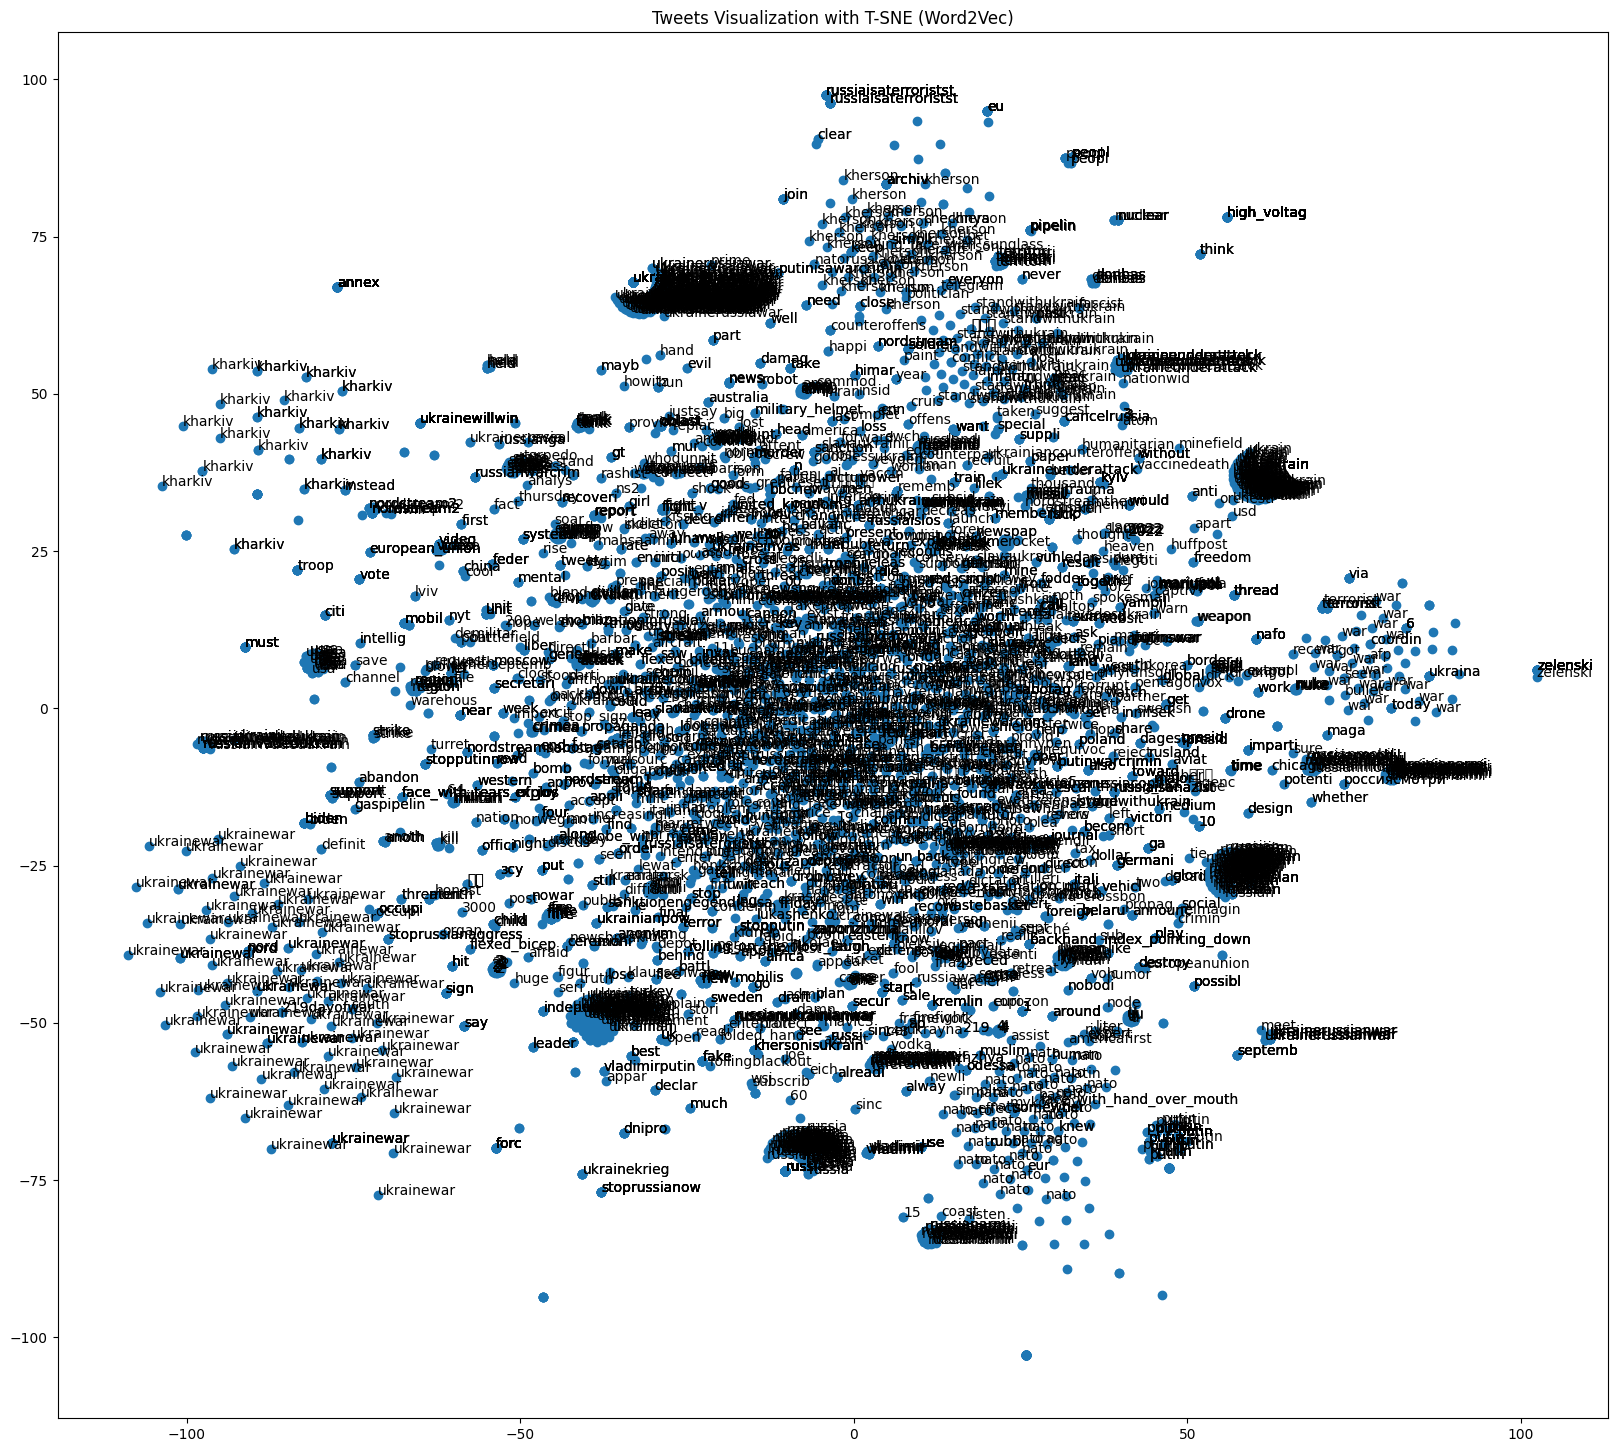

In [139]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Preprocess tweets and train Word2Vec model
tokenized_tweets = [tweet.split() for tweet in tweets_processed]
word2vec_model = Word2Vec(tokenized_tweets, vector_size=100, window=5, min_count=1, sg=0)

# Step 2: Create tweet vectors by averaging word vectors
tweet_vectors = []
for tweet in tokenized_tweets:
    word_vectors = [word2vec_model.wv[word] for word in tweet if word in word2vec_model.wv]
    if word_vectors:
        tweet_vector = np.mean(word_vectors, axis=0)
        tweet_vectors.append(tweet_vector)
    else:
        # Handle tweets with no valid word vectors
        tweet_vectors.append(np.zeros(word2vec_model.vector_size))

tweet_vectors = np.array(tweet_vectors)

# Step 3: Apply T-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(tweet_vectors)

# Step 4: Create a scatter plot
plt.figure(figsize=(20, 18))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])

# Annotate points with tweet content
for i, tweet in enumerate(tweets_processed[0:3999]):
    plt.annotate(tweet, (tsne_results[i, 0], tsne_results[i, 1]))

plt.title("Tweets Visualization with T-SNE (Word2Vec)")
plt.show()

# 2nd evaluation component

In [140]:
### CREATE A SUBSET OF THE ORIGINAL DATASET ###
import random

import json

# Ruta al archivo JSON
#docs_path = '/content/drive/MyDrive/IRWA/2023/IRWA PROJECT_PART1/Rus_Ukr_war_data.json'
docs_path = "Rus_Ukr_war_data.json"

with open(docs_path) as fp:
  lines = fp.readlines()
lines = [l.strip().replace(' +',' ')for l in lines]

# Calculate the number of elements to select (10% of the data, this can be changed as wanted)
subset_size = int(0.10 * len(lines))

# Create a random 10% subset
random_subset = random.sample(lines, subset_size)

print(len(random_subset))

400


In [141]:
### FIND LIST OF IDS FOR 1st QUERY ###

query_1_1 = "presidents visiting kyiv"
docs_1_1 = search_conjunction(query_1_1, index)

query_1_2 = "presidents visiting kiev"
docs_1_2 = search_conjunction(query_1_2, index)


Q1_2ids = docs_1_1 + docs_1_2
print(len(Q1_2ids))

0


In [142]:
### FIND LIST OF IDS FOR 2nd QUERY ###
query_2 = "supporting ukraine"
docs_2 = search_conjunction(query_2, index)

Q2_2ids = docs_2
print(len(Q2_2ids))

59


In [143]:
### FIND LIST OF IDS FOR 3rd QUERY ###
query_3_1 = "putin attacks"
docs_3_1 = search_conjunction(query_3_1, index)

query_3_2 = "putin actions"
docs_3_2 = search_conjunction(query_3_2, index)
Q3_2ids = docs_3_1 + docs_3_2
print(len(Q3_2ids))

21


In [144]:
### FIND LIST OF IDS FOR 4th QUERY ###
query_4_1 = "USA Ukraine"
docs_4_1 = search_conjunction(query_4_1, index)

Q4_2ids = docs_4_1
print(len(Q4_2ids))

274


In [145]:
### FIND LIST OF IDS FOR 4th QUERY ###
query_5_1 = "Kherson attacked"
docs_5_1 = search_conjunction(query_5_1, index)

Q5_2ids = docs_5_1
print(len(Q5_2ids))

3


In [146]:
### CREATING GROUND TRUTH FILE Q1 ###

### Getting IDs for all tweets in our random subset ###
ids_random_subset = []
lines = [json.loads(line) for line in random_subset]

for line in lines:
  tweet_id = line['id']
  ids_random_subset.append(tweet_id)
print(len(ids_random_subset))
#######################################################
import pandas as pd

data = {'ID': [], 'Label':[]}

df1 = pd.DataFrame(data)

df1 = pd.DataFrame({'ID': ids_random_subset})
df1['Label'] = df1['ID'].apply(lambda x: 1 if x in Q1_2ids else 0)

value_counts = df1['Label'].value_counts()

# Print the counts
print(value_counts)

400
0    400
Name: Label, dtype: int64


In [147]:
### CREATING GROUND TRUTH FILE Q2 ###

### Getting IDs for all tweets in our random subset ###
ids_random_subset = []
lines = [json.loads(line) for line in random_subset]

for line in lines:
  tweet_id = line['id']
  ids_random_subset.append(tweet_id)
print(len(ids_random_subset))
#######################################################
import pandas as pd

data = {'ID': [], 'Label':[]}

df2 = pd.DataFrame(data)

df2 = pd.DataFrame({'ID': ids_random_subset})
df2['Label'] = df2['ID'].apply(lambda x: 1 if x in Q2_2ids else 0)

value_counts = df2['Label'].value_counts()

# Print the counts
print(value_counts)

400
0    392
1      8
Name: Label, dtype: int64


In [148]:
### CREATING GROUND TRUTH FILE Q3 ###

### Getting IDs for all tweets in our random subset ###
ids_random_subset = []
lines = [json.loads(line) for line in random_subset]

for line in lines:
  tweet_id = line['id']
  ids_random_subset.append(tweet_id)
print(len(ids_random_subset))
#######################################################
import pandas as pd

data = {'ID': [], 'Label':[]}

df3 = pd.DataFrame(data)

df3 = pd.DataFrame({'ID': ids_random_subset})
df3['Label'] = df3['ID'].apply(lambda x: 1 if x in Q3_2ids else 0)

value_counts = df3['Label'].value_counts()

# Print the counts
print(value_counts)

400
0    400
Name: Label, dtype: int64


In [149]:
### CREATING GROUND TRUTH FILE Q4 ###

### Getting IDs for all tweets in our random subset ###
ids_random_subset = []
lines = [json.loads(line) for line in random_subset]

for line in lines:
  tweet_id = line['id']
  ids_random_subset.append(tweet_id)
print(len(ids_random_subset))
#######################################################
import pandas as pd

data = {'ID': [], 'Label':[]}

df4 = pd.DataFrame(data)

df4 = pd.DataFrame({'ID': ids_random_subset})
df4['Label'] = df4['ID'].apply(lambda x: 1 if x in Q4_2ids else 0)

value_counts = df4['Label'].value_counts()

# Print the counts
print(value_counts)

400
0    364
1     36
Name: Label, dtype: int64


In [150]:
### CREATING GROUND TRUTH FILE Q5 ###

### Getting IDs for all tweets in our random subset ###
ids_random_subset = []
lines = [json.loads(line) for line in random_subset]

for line in lines:
  tweet_id = line['id']
  ids_random_subset.append(tweet_id)
print(len(ids_random_subset))
#######################################################
import pandas as pd

data = {'ID': [], 'Label':[]}

df5 = pd.DataFrame(data)

df5 = pd.DataFrame({'ID': ids_random_subset})
df5['Label'] = df5['ID'].apply(lambda x: 1 if x in Q5_2ids else 0)

value_counts = df5['Label'].value_counts()

# Print the counts
print(value_counts)

400
0    400
Name: Label, dtype: int64


In [151]:
import xlsxwriter


excel_writer = pd.ExcelWriter('/content/Ground truth tables 2.xlsx', engine='xlsxwriter')

# Save each DataFrame to a separate sheet in the Excel file
df1.to_excel(excel_writer, sheet_name='Q1 GT', index=False)
df2.to_excel(excel_writer, sheet_name='Q2 GT', index=False)
df3.to_excel(excel_writer, sheet_name='Q3 GT', index=False)
df4.to_excel(excel_writer, sheet_name='Q4 GT', index=False)
df5.to_excel(excel_writer, sheet_name='Q5 GT', index=False)

# Close the ExcelWriter to save the Excel file
excel_writer.save()

print("DataFrames saved to Excel file 'Ground truth tables 2.xlsx'")

DataFrames saved to Excel file 'Ground truth tables 2.xlsx'


<ipython-input-151-b59f5b4eb9a6>:14: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excel_writer.save()


In [152]:
### VECTOR REPRESENTATION ###
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Ruta al archivo JSON
#docs_path = '/content/drive/MyDrive/IRWA/2023/IRWA PROJECT_PART1/Rus_Ukr_war_data.json'
docs_path = "Rus_Ukr_war_data.json"

with open(docs_path) as fp:
  lines = fp.readlines()
lines = [l.strip().replace(' +',' ')for l in lines]
### Getting all tweets' TEXT in a list ###


tweets_random_subset = []
lines = [json.loads(line) for line in random_subset]

for line in lines:
  tweet_id = line['full_text']
  tweets_random_subset.append(tweet_id)

print(tweets_random_subset)

tweets_processed = []


for tweet in tweets_random_subset:
  proc_tweet = build_terms(tweet)
  tweets_processed.append(proc_tweet)

print(len(tweets_processed))

tweets_processed = [item for sublist in tweets_processed for item in sublist]
print(tweets_processed)

['Romania and Bulgaria urge their citizens to leave Russia immediately.\n\n#UkraineRussiaWar #Ukraine #UkraineUnderAttack #UkraineWar #UkraineWarCrimes #Ukrainian #UkraineRussiaConflict #Ukraina #StopPutinNOW #StopRussia https://t.co/jW3s2iLCCx', 'German MP calls for stripping Russia of veto right in UNSC https://t.co/Z32cMhdsvi #Ukraine  #UkraineRussiaWar #UkraineUnderAttack #UkraineWarNews', '#Digital #Currency is death of your #freedom \n#GreatReset #NWO #NWOAgenda2030 #DigitalID #cashlesssociety #CovidWasTheBeginning #vaccine #VaccineDeaths #HungerGames #UkraineRussiaWar #NordStream2\n#KlausSchwab #BillGatesBioTerrorist #HabeckRuecktritt https://t.co/lvOwOmD20X', 'The two hundred-eighteenth (218) day of the heroic resistance of the Ukrainian people to the Russian military large-scale invasion  ⚔️\n#Ukraine️ #UkraineRussiaWar \nhttps://t.co/aXYMIXcvDO', 'RUS SM propaganda is pivoting to how "glorious" of a day it is today and Putin\'s "historic" speech on invading and illegally taki

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20420 (\N{CJK UNIFIED IDEOGRAPH-4FC4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32599 (\N{CJK UNIFIED IDEOGRAPH-7F57}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26031 (\N{CJK UNIFIED IDEOGRAPH-65AF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20044 (\N{CJK UNIFIED IDEOGRAPH-4E4C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20811 (\N{CJK UNIFIED IDEOGRAPH-514B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

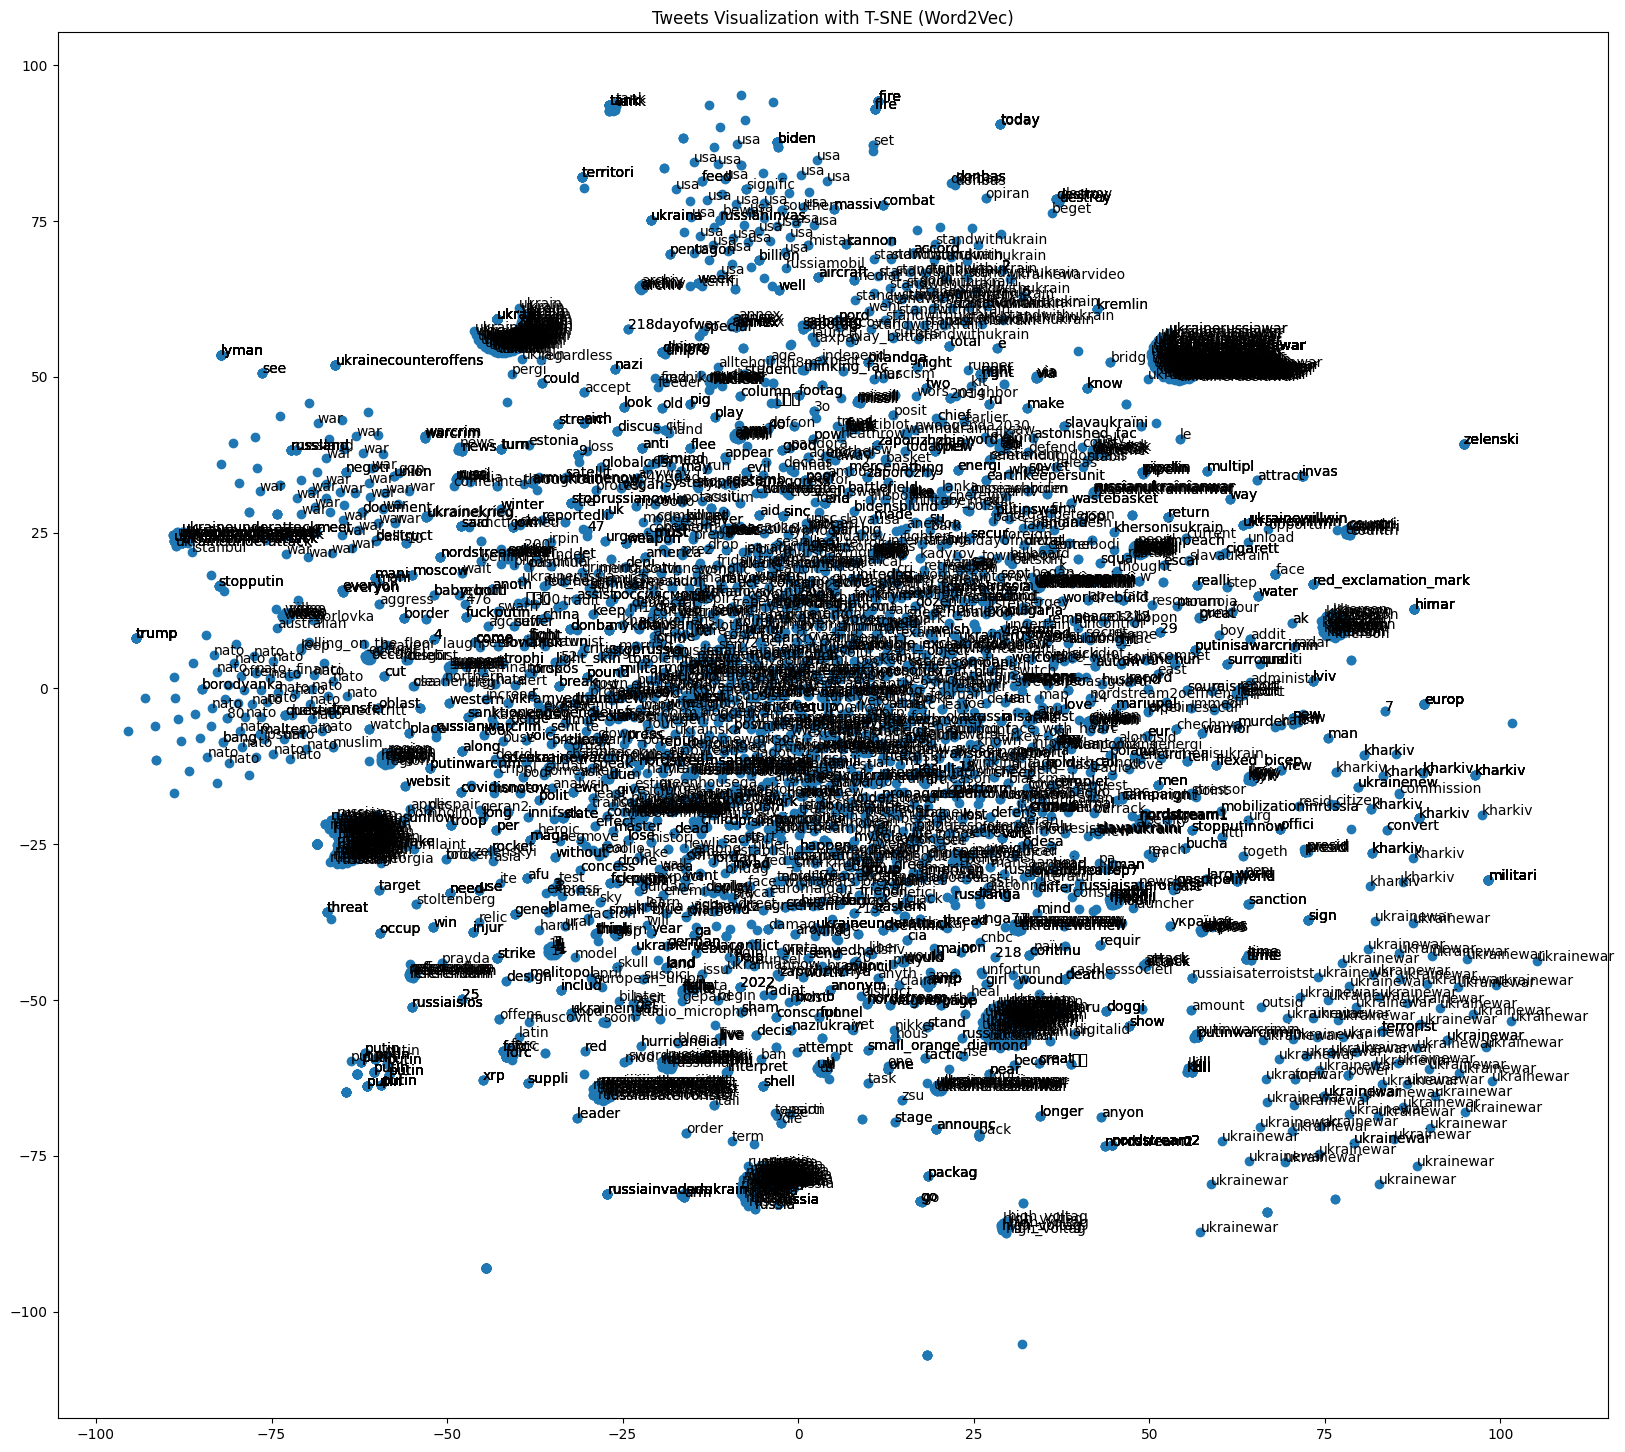

In [153]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Preprocess tweets and train Word2Vec model
tokenized_tweets = [tweet.split() for tweet in tweets_processed]
word2vec_model = Word2Vec(tokenized_tweets, vector_size=100, window=5, min_count=1, sg=0)

# Step 2: Create tweet vectors by averaging word vectors
tweet_vectors = []
for tweet in tokenized_tweets:
    word_vectors = [word2vec_model.wv[word] for word in tweet if word in word2vec_model.wv]
    if word_vectors:
        tweet_vector = np.mean(word_vectors, axis=0)
        tweet_vectors.append(tweet_vector)
    else:
        # Handle tweets with no valid word vectors
        tweet_vectors.append(np.zeros(word2vec_model.vector_size))

tweet_vectors = np.array(tweet_vectors)

# Step 3: Apply T-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(tweet_vectors)

# Step 4: Create a scatter plot
plt.figure(figsize=(20, 18))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])

# Annotate points with tweet content
for i, tweet in enumerate(tweets_processed[0:3999]):
    plt.annotate(tweet, (tsne_results[i, 0], tsne_results[i, 1]))

plt.title("Tweets Visualization with T-SNE (Word2Vec)")
plt.show()